# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

02:12:20 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=100689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=973890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=943834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=187733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=148375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=492602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

02:12:22 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=591052;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=596879;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

02:12:23 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=840630;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=923021;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

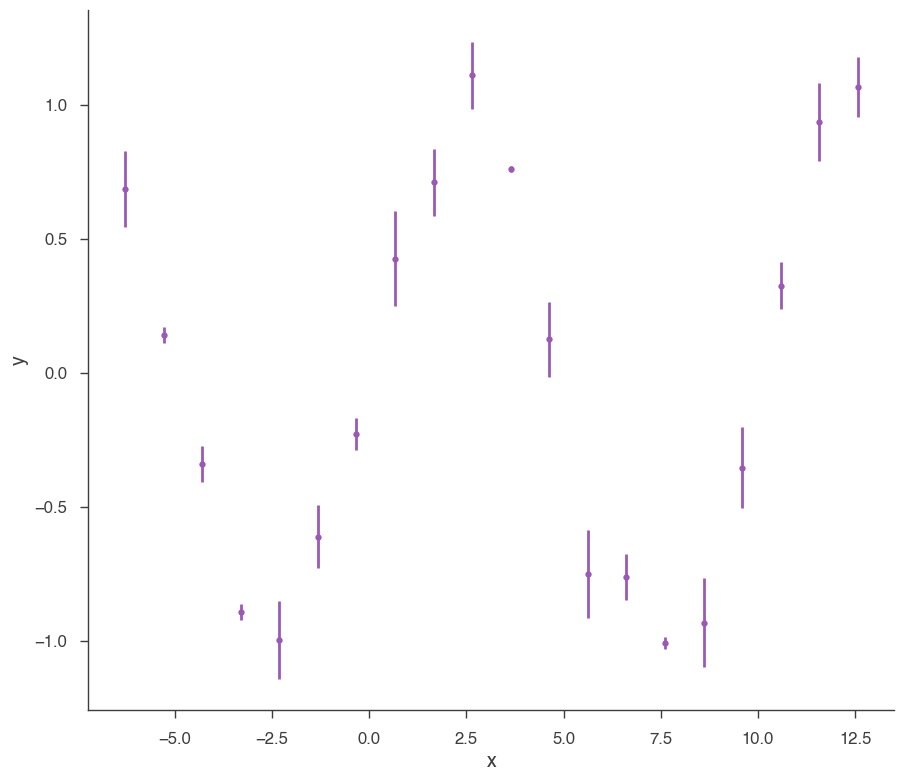

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=92901;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=547282;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

02:12:26 INFO      Mean acceptance fraction: 0.7188                                            ]8;id=722754;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=615450;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=666696;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=251586;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=379513;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=440546;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.000 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.904784
total,-7.904784


Values of statistical measures:

,statistical measures
AIC,20.515451
BIC,21.801033
DIC,19.848719
PDIC,2.019488


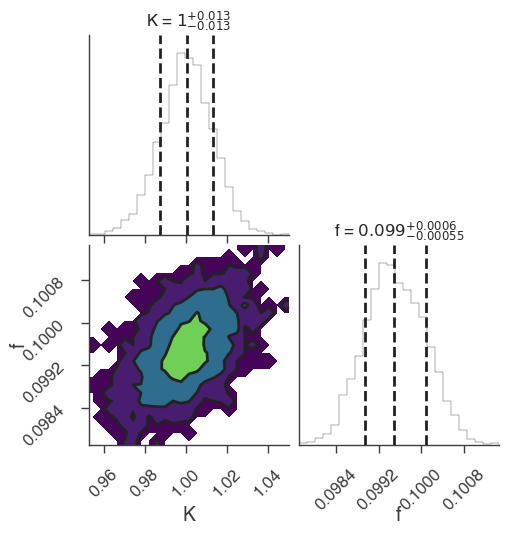

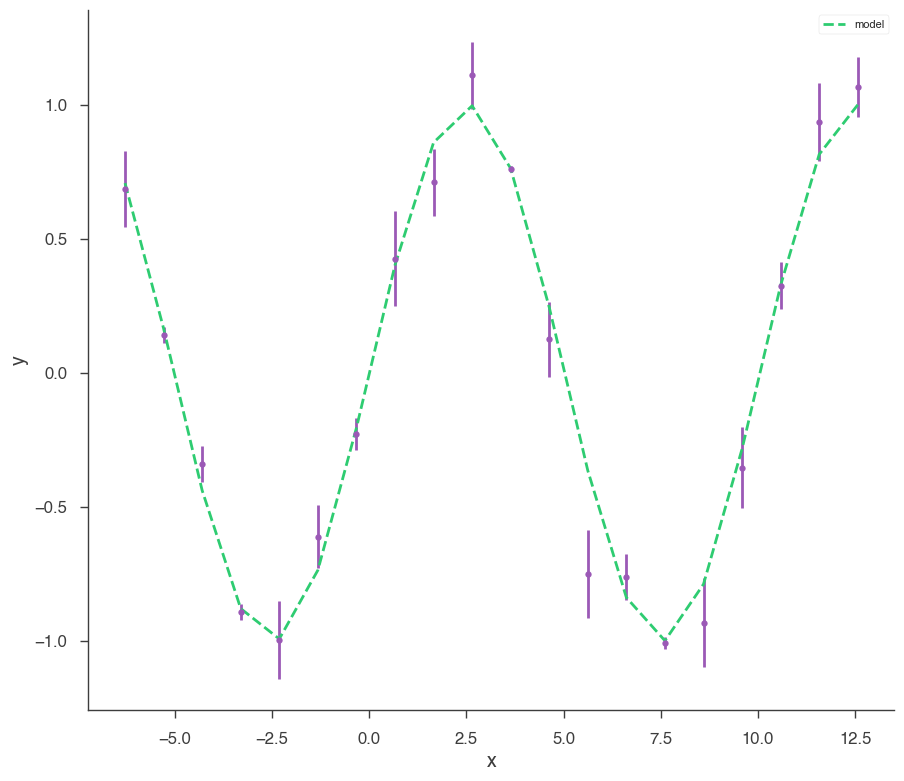

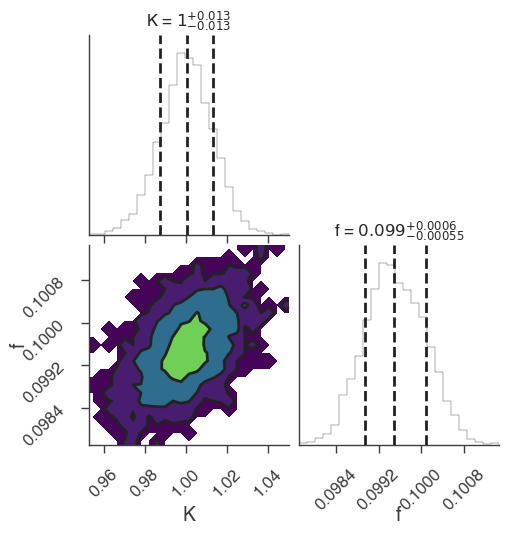

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

02:12:27 INFO      sampler set to multinest                                                ]8;id=498973;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=977054;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -17.450539237096965      +/-  0.14595495478091025     
  analysing data from chains/fit-.txt
 Total Likelihood Evaluations:         5740
 Sampling finished. Exiting MultiNest


02:12:28 INFO      fit restored to maximum of posterior                                         ]8;id=400537;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=208527;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=30663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=949283;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.014 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.07 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.910093
total,-7.910093


Values of statistical measures:

,statistical measures
AIC,20.526069
BIC,21.811651
DIC,19.776757
PDIC,1.979036
log(Z),-7.578673


         INFO      deleting the chain directory chains                                     ]8;id=541362;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=164186;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

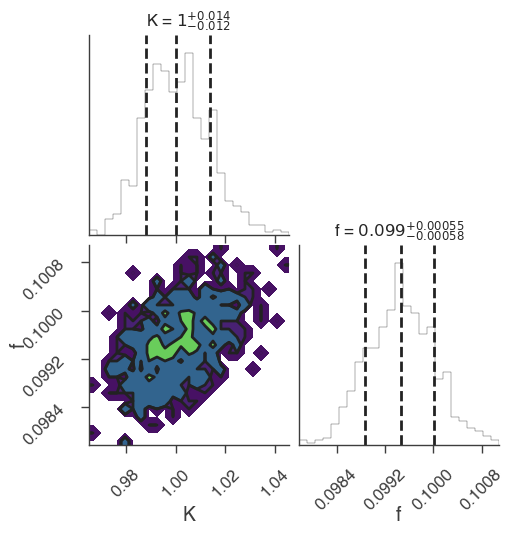

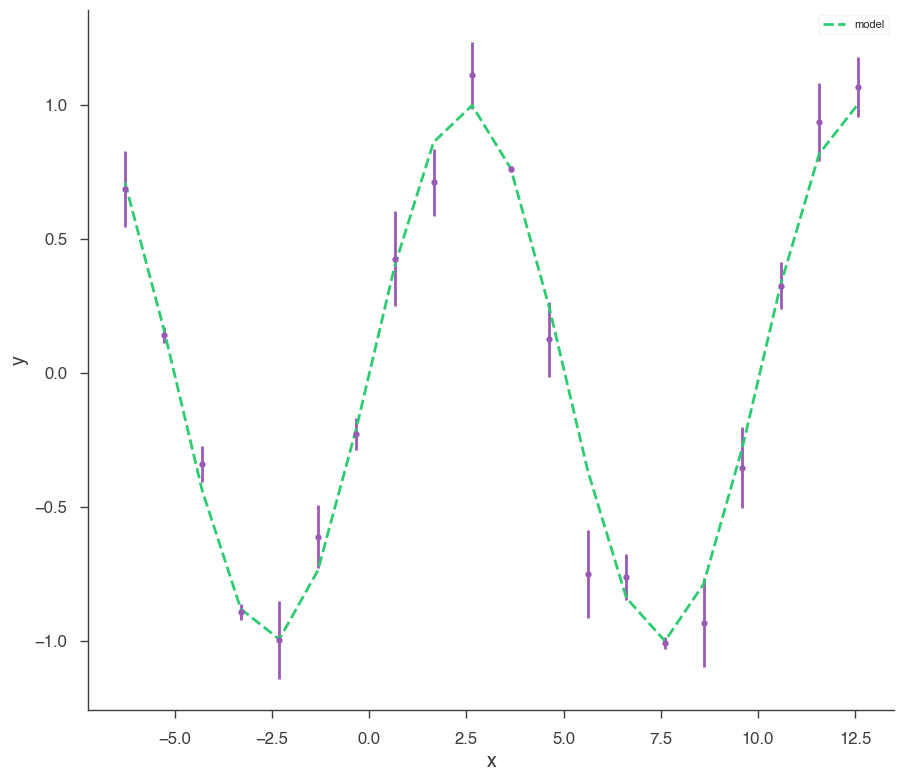

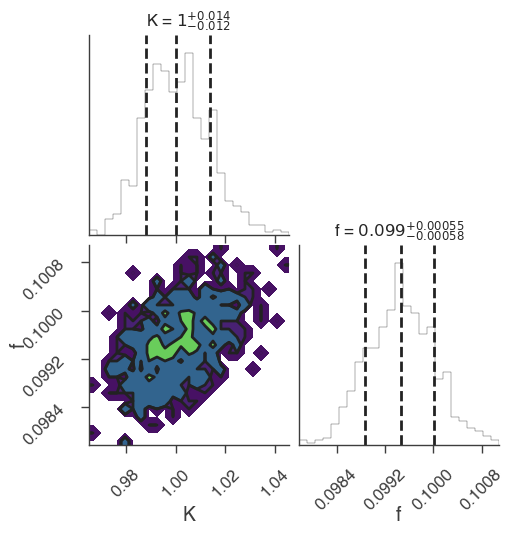

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

02:12:29 INFO      sampler set to dynesty_nested                                           ]8;id=908888;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=762366;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

220it [00:00, 2198.50it/s, bound: 0 | nc: 1 | ncall: 672 | eff(%): 32.738 | loglstar:   -inf < -7075.520 <    inf | logz: -7082.754 +/-  0.134 | dlogz: 7203.462 >  0.409]

440it [00:00, 1733.72it/s, bound: 0 | nc: 3 | ncall: 1124 | eff(%): 39.146 | loglstar:   -inf < -3913.665 <    inf | logz: -3920.846 +/-  0.125 | dlogz: 3910.794 >  0.409]

620it [00:00, 1338.26it/s, bound: 0 | nc: 12 | ncall: 1740 | eff(%): 35.632 | loglstar:   -inf < -2290.978 <    inf | logz: -2299.211 +/-  0.143 | dlogz: 2302.245 >  0.409]

764it [00:00, 1151.41it/s, bound: 0 | nc: 1 | ncall: 2475 | eff(%): 30.869 | loglstar:   -inf < -1417.235 <    inf | logz: -1425.827 +/-  0.146 | dlogz: 1422.439 >  0.409] 

886it [00:00, 930.66it/s, bound: 0 | nc: 6 | ncall: 3307 | eff(%): 26.792 | loglstar:   -inf < -1135.192 <    inf | logz: -1143.266 +/-  0.134 | dlogz: 1131.857 >  0.409] 

987it [00:00, 832.71it/s, bound: 0 | nc: 4 | ncall: 4359 | eff(%): 22.643 | loglstar:   -inf < -925.924 <    inf | logz: -933.748 +/-  0.134 | dlogz: 921.936 >  0.409]   

1075it [00:01, 672.40it/s, bound: 0 | nc: 9 | ncall: 5665 | eff(%): 18.976 | loglstar:   -inf < -841.662 <    inf | logz: -849.405 +/-  0.134 | dlogz: 839.252 >  0.409]

1148it [00:01, 639.13it/s, bound: 0 | nc: 20 | ncall: 6680 | eff(%): 17.186 | loglstar:   -inf < -778.512 <    inf | logz: -786.645 +/-  0.137 | dlogz: 776.460 >  0.409]

1215it [00:01, 495.79it/s, bound: 0 | nc: 21 | ncall: 8083 | eff(%): 15.032 | loglstar:   -inf < -724.680 <    inf | logz: -733.653 +/-  0.142 | dlogz: 723.762 >  0.409]

1270it [00:01, 471.20it/s, bound: 0 | nc: 15 | ncall: 9178 | eff(%): 13.837 | loglstar:   -inf < -668.359 <    inf | logz: -677.718 +/-  0.146 | dlogz: 667.968 >  0.409]

1320it [00:01, 421.37it/s, bound: 0 | nc: 21 | ncall: 10127 | eff(%): 13.034 | loglstar:   -inf < -569.476 <    inf | logz: -579.275 +/-  0.153 | dlogz: 570.549 >  0.409]

1364it [00:02, 347.23it/s, bound: 0 | nc: 24 | ncall: 11495 | eff(%): 11.866 | loglstar:   -inf < -522.909 <    inf | logz: -532.093 +/-  0.146 | dlogz: 521.578 >  0.409]

1401it [00:02, 312.63it/s, bound: 0 | nc: 33 | ncall: 12416 | eff(%): 11.284 | loglstar:   -inf < -476.104 <    inf | logz: -486.204 +/-  0.156 | dlogz: 477.553 >  0.409]

1434it [00:02, 288.01it/s, bound: 0 | nc: 2 | ncall: 13199 | eff(%): 10.864 | loglstar:   -inf < -439.824 <    inf | logz: -448.564 +/-  0.140 | dlogz: 437.561 >  0.409] 

1464it [00:02, 248.16it/s, bound: 0 | nc: 49 | ncall: 14538 | eff(%): 10.070 | loglstar:   -inf < -405.066 <    inf | logz: -414.763 +/-  0.146 | dlogz: 404.090 >  0.409]

1490it [00:02, 210.96it/s, bound: 1 | nc: 1 | ncall: 14767 | eff(%): 10.090 | loglstar:   -inf < -379.814 <    inf | logz: -390.134 +/-  0.158 | dlogz: 381.668 >  0.409] 

1657it [00:02, 492.11it/s, bound: 1 | nc: 1 | ncall: 15018 | eff(%): 11.033 | loglstar:   -inf < -257.166 <    inf | logz: -266.526 +/-  0.146 | dlogz: 254.913 >  0.409]

1802it [00:02, 698.86it/s, bound: 1 | nc: 1 | ncall: 15313 | eff(%): 11.768 | loglstar:   -inf < -183.587 <    inf | logz: -192.634 +/-  0.145 | dlogz: 180.483 >  0.409]

1892it [00:03, 673.22it/s, bound: 2 | nc: 1 | ncall: 15453 | eff(%): 12.244 | loglstar:   -inf < -151.167 <    inf | logz: -160.271 +/-  0.145 | dlogz: 147.845 >  0.409]

2058it [00:03, 902.81it/s, bound: 2 | nc: 1 | ncall: 15743 | eff(%): 13.072 | loglstar:   -inf < -97.394 <    inf | logz: -107.101 +/-  0.148 | dlogz: 94.292 >  0.409]  

2165it [00:03, 761.02it/s, bound: 3 | nc: 1 | ncall: 15972 | eff(%): 13.555 | loglstar:   -inf < -75.165 <    inf | logz: -85.022 +/-  0.149 | dlogz: 71.915 >  0.409] 

2346it [00:03, 994.48it/s, bound: 3 | nc: 2 | ncall: 16226 | eff(%): 14.458 | loglstar:   -inf < -50.919 <    inf | logz: -60.875 +/-  0.149 | dlogz: 47.240 >  0.409]

2489it [00:03, 856.92it/s, bound: 4 | nc: 1 | ncall: 16547 | eff(%): 15.042 | loglstar:   -inf < -37.847 <    inf | logz: -47.679 +/-  0.148 | dlogz: 33.649 >  0.409]

2671it [00:03, 1060.37it/s, bound: 4 | nc: 1 | ncall: 16828 | eff(%): 15.872 | loglstar:   -inf < -26.106 <    inf | logz: -35.579 +/-  0.146 | dlogz: 21.039 >  0.409]

2797it [00:04, 856.84it/s, bound: 5 | nc: 1 | ncall: 17157 | eff(%): 16.302 | loglstar:   -inf < -20.234 <    inf | logz: -29.825 +/-  0.147 | dlogz: 14.963 >  0.409] 

2994it [00:04, 1081.77it/s, bound: 5 | nc: 5 | ncall: 17425 | eff(%): 17.182 | loglstar:   -inf < -15.529 <    inf | logz: -24.968 +/-  0.146 | dlogz:  9.598 >  0.409]

3140it [00:04, 1166.91it/s, bound: 5 | nc: 5 | ncall: 17703 | eff(%): 17.737 | loglstar:   -inf < -13.448 <    inf | logz: -22.787 +/-  0.145 | dlogz:  7.046 >  0.409]

3277it [00:04, 987.61it/s, bound: 6 | nc: 2 | ncall: 17900 | eff(%): 18.307 | loglstar:   -inf < -11.891 <    inf | logz: -21.364 +/-  0.145 | dlogz:  5.292 >  0.409] 

3443it [00:04, 1131.86it/s, bound: 6 | nc: 7 | ncall: 18190 | eff(%): 18.928 | loglstar:   -inf < -10.494 <    inf | logz: -20.082 +/-  0.146 | dlogz:  3.616 >  0.409]

3574it [00:04, 896.92it/s, bound: 7 | nc: 1 | ncall: 18428 | eff(%): 19.394 | loglstar:   -inf < -9.709 <    inf | logz: -19.316 +/-  0.146 | dlogz:  2.573 >  0.409]  

3743it [00:04, 1059.33it/s, bound: 7 | nc: 2 | ncall: 18687 | eff(%): 20.030 | loglstar:   -inf < -9.126 <    inf | logz: -18.661 +/-  0.146 | dlogz:  1.632 >  0.409]

3870it [00:05, 895.93it/s, bound: 8 | nc: 2 | ncall: 18974 | eff(%): 20.396 | loglstar:   -inf < -8.758 <    inf | logz: -18.325 +/-  0.146 | dlogz:  1.144 >  0.409] 

4117it [00:05, 1222.67it/s, bound: 8 | nc: 5 | ncall: 19349 | eff(%): 21.278 | loglstar:   -inf < -8.390 <    inf | logz: -17.916 +/-  0.146 | dlogz:  0.569 >  0.409]

4235it [00:05, 782.81it/s, +400 | bound: 9 | nc: 1 | ncall: 19981 | eff(%): 23.671 | loglstar:   -inf < -7.905 <    inf | logz: -17.445 +/-  0.146 | dlogz:  0.001 >  0.409]

02:12:35 INFO      fit restored to maximum of posterior                                         ]8;id=134203;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=197393;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=130912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=666192;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(10.00 -0.12 +0.14) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.905515
total,-7.905515


Values of statistical measures:

,statistical measures
AIC,20.516913
BIC,21.802495
DIC,19.784524
PDIC,1.984315
log(Z),-7.576347


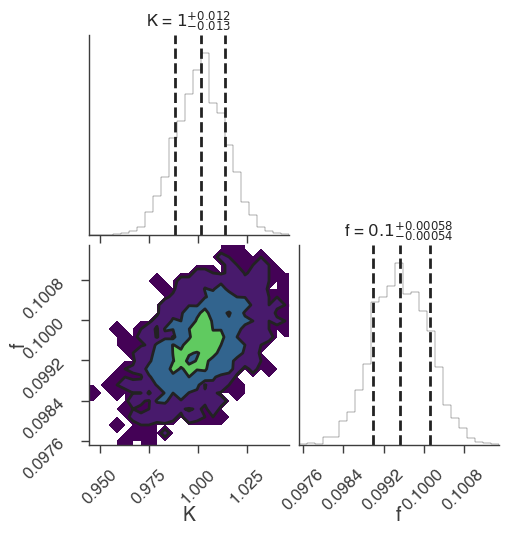

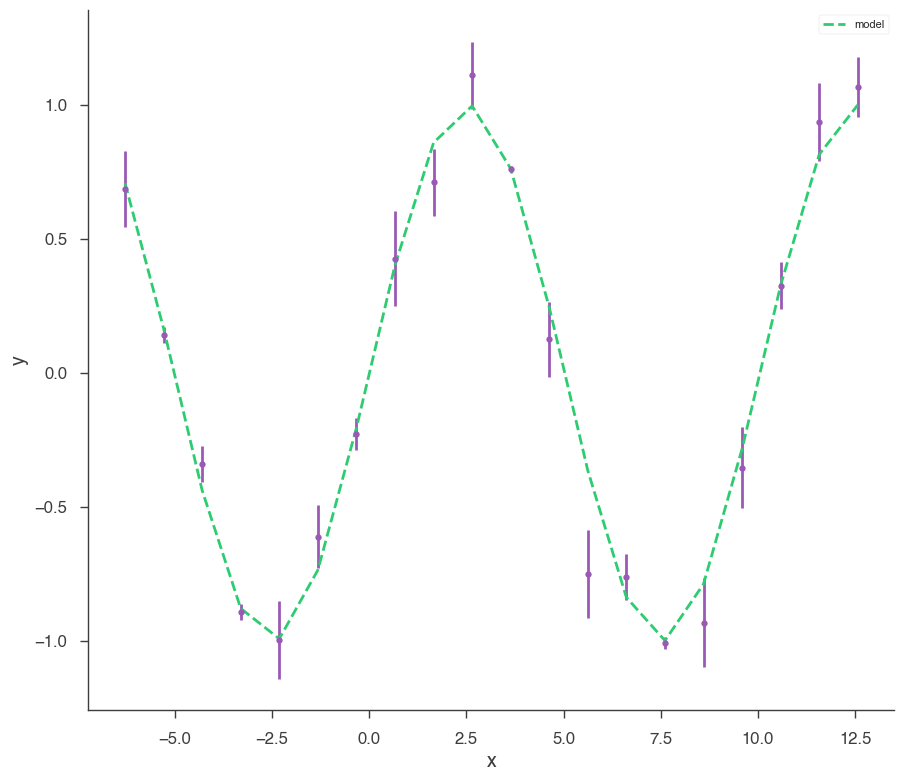

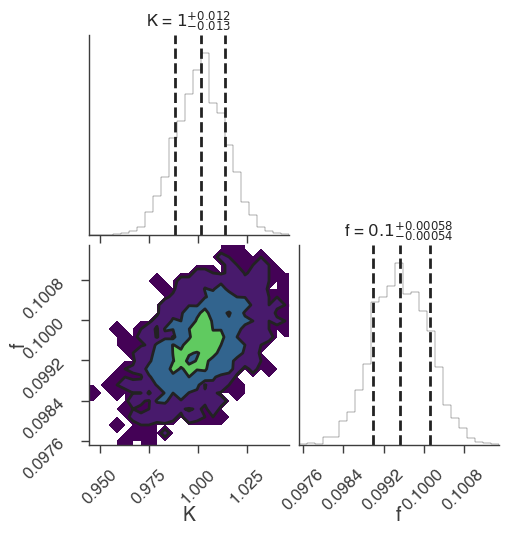

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

02:12:36 INFO      sampler set to dynesty_dynamic                                          ]8;id=827042;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=431619;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

156it [00:00, 1557.29it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 177 | eff(%): 23.043 | loglstar:   -inf < -9366.546 <    inf | logz: -9373.766 +/-  0.120 | dlogz: 9317.615 >  0.010]

317it [00:00, 1586.26it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 441 | eff(%): 33.688 | loglstar:   -inf < -5932.349 <    inf | logz: -5939.890 +/-  0.123 | dlogz: 5877.817 >  0.010]

476it [00:00, 1420.94it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 792 | eff(%): 36.842 | loglstar:   -inf < -3969.699 <    inf | logz: -3977.538 +/-  0.124 | dlogz: 3971.217 >  0.010]

620it [00:00, 1275.06it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1213 | eff(%): 36.194 | loglstar:   -inf < -2954.423 <    inf | logz: -2961.887 +/-  0.118 | dlogz: 2952.185 >  0.010]

750it [00:00, 1080.26it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1772 | eff(%): 33.011 | loglstar:   -inf < -2034.789 <    inf | logz: -2042.705 +/-  0.121 | dlogz: 2032.936 >  0.010]

863it [00:00, 993.52it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 2322 | eff(%): 30.581 | loglstar:   -inf < -1606.140 <    inf | logz: -1613.836 +/-  0.121 | dlogz: 1603.428 >  0.010] 

966it [00:00, 871.92it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3047 | eff(%): 27.234 | loglstar:   -inf < -1308.107 <    inf | logz: -1316.030 +/-  0.123 | dlogz: 1305.469 >  0.010]

1057it [00:01, 791.31it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3704 | eff(%): 25.143 | loglstar:   -inf < -1105.480 <    inf | logz: -1113.803 +/-  0.121 | dlogz: 1102.803 >  0.010]

1139it [00:01, 712.90it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4591 | eff(%): 22.373 | loglstar:   -inf < -983.034 <    inf | logz: -991.733 +/-  0.127 | dlogz: 981.226 >  0.010]   

1213it [00:01, 625.98it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 5358 | eff(%): 20.707 | loglstar:   -inf < -904.044 <    inf | logz: -912.077 +/-  0.118 | dlogz: 900.333 >  0.010]

1278it [00:01, 569.11it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6112 | eff(%): 19.328 | loglstar:   -inf < -856.731 <    inf | logz: -865.985 +/-  0.131 | dlogz: 855.555 >  0.010]

1337it [00:01, 473.29it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7046 | eff(%): 17.718 | loglstar:   -inf < -801.681 <    inf | logz: -809.681 +/-  0.121 | dlogz: 798.861 >  0.010]

1387it [00:01, 425.68it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 7925 | eff(%): 16.463 | loglstar:   -inf < -773.548 <    inf | logz: -781.907 +/-  0.121 | dlogz: 771.069 >  0.010]

1432it [00:02, 381.52it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 8807 | eff(%): 15.386 | loglstar:   -inf < -746.148 <    inf | logz: -754.483 +/-  0.120 | dlogz: 743.519 >  0.010] 

1472it [00:02, 323.38it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 9720 | eff(%): 14.403 | loglstar:   -inf < -727.177 <    inf | logz: -735.793 +/-  0.125 | dlogz: 725.595 >  0.010]

1506it [00:02, 309.90it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 10289 | eff(%): 13.959 | loglstar:   -inf < -694.118 <    inf | logz: -703.116 +/-  0.130 | dlogz: 693.180 >  0.010]

1538it [00:02, 266.87it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 11239 | eff(%): 13.102 | loglstar:   -inf < -654.417 <    inf | logz: -663.487 +/-  0.131 | dlogz: 653.537 >  0.010]

1566it [00:02, 253.42it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11801 | eff(%): 12.731 | loglstar:   -inf < -630.894 <    inf | logz: -639.124 +/-  0.124 | dlogz: 628.396 >  0.010] 

1592it [00:02, 243.92it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 12312 | eff(%): 12.426 | loglstar:   -inf < -596.995 <    inf | logz: -606.282 +/-  0.131 | dlogz: 596.229 >  0.010]

1617it [00:02, 231.00it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 12893 | eff(%): 12.073 | loglstar:   -inf < -563.334 <    inf | logz: -571.997 +/-  0.126 | dlogz: 561.324 >  0.010]

1641it [00:03, 219.82it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 13465 | eff(%): 11.751 | loglstar:   -inf < -536.871 <    inf | logz: -545.389 +/-  0.125 | dlogz: 534.615 >  0.010]

1663it [00:03, 210.17it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 14265 | eff(%): 11.263 | loglstar:   -inf < -515.073 <    inf | logz: -523.867 +/-  0.128 | dlogz: 513.140 >  0.010] 

1684it [00:03, 198.31it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 14782 | eff(%): 11.020 | loglstar:   -inf < -491.028 <    inf | logz: -499.806 +/-  0.128 | dlogz: 488.969 >  0.010]

1704it [00:03, 187.02it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 15356 | eff(%): 10.747 | loglstar:   -inf < -469.995 <    inf | logz: -479.018 +/-  0.131 | dlogz: 468.459 >  0.010] 

1723it [00:03, 159.24it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 16204 | eff(%): 10.315 | loglstar:   -inf < -444.404 <    inf | logz: -453.521 +/-  0.131 | dlogz: 442.805 >  0.010]

1740it [00:03, 156.66it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 16768 | eff(%): 10.076 | loglstar:   -inf < -432.315 <    inf | logz: -441.054 +/-  0.129 | dlogz: 430.083 >  0.010]

1756it [00:03, 115.69it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16983 | eff(%): 10.044 | loglstar:   -inf < -414.326 <    inf | logz: -423.199 +/-  0.127 | dlogz: 412.166 >  0.010] 

1932it [00:04, 451.19it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17234 | eff(%): 10.894 | loglstar:   -inf < -300.197 <    inf | logz: -309.555 +/-  0.132 | dlogz: 298.361 >  0.010]

2069it [00:04, 658.31it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17502 | eff(%): 11.493 | loglstar:   -inf < -237.141 <    inf | logz: -246.395 +/-  0.131 | dlogz: 234.689 >  0.010]

2156it [00:04, 561.96it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17715 | eff(%): 11.836 | loglstar:   -inf < -201.214 <    inf | logz: -210.674 +/-  0.130 | dlogz: 198.753 >  0.010]

2339it [00:04, 835.82it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17971 | eff(%): 12.663 | loglstar:   -inf < -135.474 <    inf | logz: -145.194 +/-  0.131 | dlogz: 132.886 >  0.010]

2495it [00:04, 1005.91it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18277 | eff(%): 13.288 | loglstar:   -inf < -103.931 <    inf | logz: -113.010 +/-  0.128 | dlogz: 100.212 >  0.010]

2616it [00:04, 823.49it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18517 | eff(%): 13.756 | loglstar:   -inf < -82.513 <    inf | logz: -92.455 +/-  0.132 | dlogz: 79.478 >  0.010]    

2783it [00:04, 1007.33it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18766 | eff(%): 14.445 | loglstar:   -inf < -62.719 <    inf | logz: -71.819 +/-  0.129 | dlogz: 58.396 >  0.010]

2932it [00:04, 1121.42it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19064 | eff(%): 14.987 | loglstar:   -inf < -46.855 <    inf | logz: -56.556 +/-  0.131 | dlogz: 42.861 >  0.010]

3061it [00:05, 813.17it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19281 | eff(%): 15.474 | loglstar:   -inf < -36.492 <    inf | logz: -46.240 +/-  0.132 | dlogz: 32.269 >  0.010] 

3220it [00:05, 969.24it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19503 | eff(%): 16.098 | loglstar:   -inf < -28.462 <    inf | logz: -38.123 +/-  0.131 | dlogz: 23.812 >  0.010]

3341it [00:05, 1009.31it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 19731 | eff(%): 16.514 | loglstar:   -inf < -23.755 <    inf | logz: -33.276 +/-  0.131 | dlogz: 18.708 >  0.010]

3460it [00:05, 838.13it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20000 | eff(%): 16.878 | loglstar:   -inf < -20.167 <    inf | logz: -29.613 +/-  0.131 | dlogz: 14.798 >  0.010] 

3693it [00:05, 1157.45it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20330 | eff(%): 17.729 | loglstar:   -inf < -15.696 <    inf | logz: -25.194 +/-  0.130 | dlogz:  9.904 >  0.010]

3853it [00:05, 1260.64it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20655 | eff(%): 18.213 | loglstar:   -inf < -13.555 <    inf | logz: -23.010 +/-  0.130 | dlogz:  7.396 >  0.010]

3999it [00:06, 1019.04it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 20873 | eff(%): 18.711 | loglstar:   -inf < -12.254 <    inf | logz: -21.644 +/-  0.130 | dlogz:  5.738 >  0.010]

4166it [00:06, 1159.37it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21134 | eff(%): 19.257 | loglstar:   -inf < -11.035 <    inf | logz: -20.472 +/-  0.130 | dlogz:  4.258 >  0.010]

4302it [00:06, 1170.29it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21459 | eff(%): 19.591 | loglstar:   -inf < -10.313 <    inf | logz: -19.765 +/-  0.130 | dlogz:  3.308 >  0.010]

4433it [00:06, 991.49it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21630 | eff(%): 20.032 | loglstar:   -inf < -9.712 <    inf | logz: -19.212 +/-  0.130 | dlogz:  2.538 >  0.010]  

4585it [00:06, 1109.74it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21887 | eff(%): 20.481 | loglstar:   -inf < -9.190 <    inf | logz: -18.711 +/-  0.130 | dlogz:  1.826 >  0.010]

4710it [00:06, 1128.58it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22190 | eff(%): 20.758 | loglstar:   -inf < -8.910 <    inf | logz: -18.401 +/-  0.130 | dlogz:  1.379 >  0.010]

4833it [00:06, 893.61it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22358 | eff(%): 21.144 | loglstar:   -inf < -8.670 <    inf | logz: -18.166 +/-  0.130 | dlogz:  1.043 >  0.010] 

5031it [00:06, 1132.75it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22700 | eff(%): 21.685 | loglstar:   -inf < -8.427 <    inf | logz: -17.891 +/-  0.130 | dlogz:  0.662 >  0.010]

5163it [00:07, 948.62it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23002 | eff(%): 21.968 | loglstar:   -inf < -8.312 <    inf | logz: -17.763 +/-  0.130 | dlogz:  0.491 >  0.010] 

5323it [00:07, 1088.46it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23231 | eff(%): 22.431 | loglstar:   -inf < -8.192 <    inf | logz: -17.648 +/-  0.130 | dlogz:  0.344 >  0.010]

5457it [00:07, 1146.33it/s, batch: 0 | bound: 9 | nc: 5 | ncall: 23500 | eff(%): 22.738 | loglstar:   -inf < -8.117 <    inf | logz: -17.575 +/-  0.130 | dlogz:  0.256 >  0.010]

5586it [00:07, 848.06it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23760 | eff(%): 23.026 | loglstar:   -inf < -8.067 <    inf | logz: -17.522 +/-  0.130 | dlogz:  0.194 >  0.010]

5789it [00:07, 1090.01it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24055 | eff(%): 23.576 | loglstar:   -inf < -8.012 <    inf | logz: -17.462 +/-  0.130 | dlogz:  0.126 >  0.010]

5942it [00:07, 1185.89it/s, batch: 0 | bound: 10 | nc: 7 | ncall: 24396 | eff(%): 23.867 | loglstar:   -inf < -7.982 <    inf | logz: -17.430 +/-  0.130 | dlogz:  0.092 >  0.010]

6082it [00:08, 853.12it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24601 | eff(%): 24.230 | loglstar:   -inf < -7.965 <    inf | logz: -17.408 +/-  0.130 | dlogz:  0.069 >  0.010] 

6254it [00:08, 1020.52it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24866 | eff(%): 24.655 | loglstar:   -inf < -7.949 <    inf | logz: -17.389 +/-  0.130 | dlogz:  0.048 >  0.010]

6385it [00:08, 1059.79it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25136 | eff(%): 24.906 | loglstar:   -inf < -7.938 <    inf | logz: -17.378 +/-  0.130 | dlogz:  0.037 >  0.010]

6512it [00:08, 793.23it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25347 | eff(%): 25.194 | loglstar:   -inf < -7.930 <    inf | logz: -17.370 +/-  0.130 | dlogz:  0.029 >  0.010] 

6670it [00:08, 944.19it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25605 | eff(%): 25.551 | loglstar:   -inf < -7.923 <    inf | logz: -17.362 +/-  0.130 | dlogz:  0.021 >  0.010]

6813it [00:08, 1048.59it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25885 | eff(%): 25.821 | loglstar:   -inf < -7.918 <    inf | logz: -17.357 +/-  0.130 | dlogz:  0.016 >  0.010]

6940it [00:09, 840.68it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26079 | eff(%): 26.111 | loglstar:   -inf < -7.916 <    inf | logz: -17.354 +/-  0.130 | dlogz:  0.012 >  0.010] 

7294it [00:09, 1391.65it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26465 | eff(%): 27.316 | loglstar:   -inf < -7.909 <    inf | logz: -17.347 +/-  0.130 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7531it [00:09, 593.17it/s, batch: 1 | bound: 0 | nc: 2 | ncall: 26702 | eff(%): 28.204 | loglstar: -9.705 < -8.033 < -8.388 | logz: -17.342 +/-  0.134 | stop:  1.421]            

7710it [00:10, 719.84it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 26935 | eff(%): 28.082 | loglstar: -9.705 < -9.191 < -8.388 | logz: -17.342 +/-  0.134 | stop:  1.421]

7861it [00:10, 822.60it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27197 | eff(%): 28.362 | loglstar: -9.705 < -8.870 < -8.388 | logz: -17.342 +/-  0.134 | stop:  1.421]

8009it [00:10, 709.30it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27485 | eff(%): 28.598 | loglstar: -9.705 < -8.623 < -8.388 | logz: -17.342 +/-  0.134 | stop:  1.421]

8203it [00:10, 890.08it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27740 | eff(%): 29.027 | loglstar: -9.705 < -8.393 < -8.388 | logz: -17.342 +/-  0.134 | stop:  1.421]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8712it [00:11, 775.08it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28277 | eff(%): 30.809 | loglstar: -9.705 < -7.905 < -8.388 | logz: -17.342 +/-  0.134 | stop:  0.961]

8712it [00:11, 769.55it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28277 | eff(%): 30.809 | loglstar: -9.705 < -7.905 < -8.388 | logz: -17.342 +/-  0.134 | stop:  0.961]

02:12:47 INFO      fit restored to maximum of posterior                                         ]8;id=600070;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=396843;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=259895;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=899742;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.000 -0.013 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.904696
total,-7.904696


Values of statistical measures:

,statistical measures
AIC,20.515274
BIC,21.800857
DIC,19.783505
PDIC,1.986895
log(Z),-7.540138


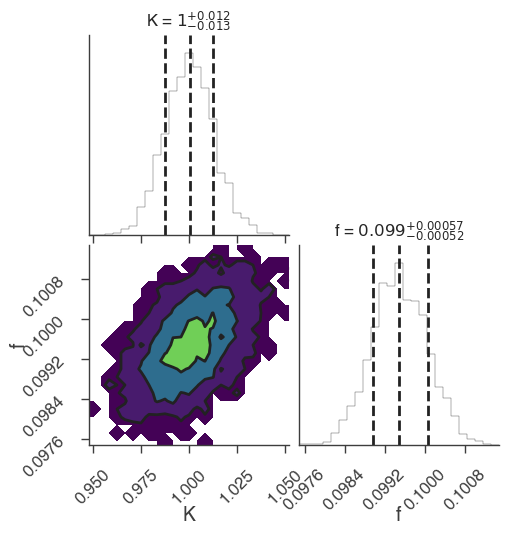

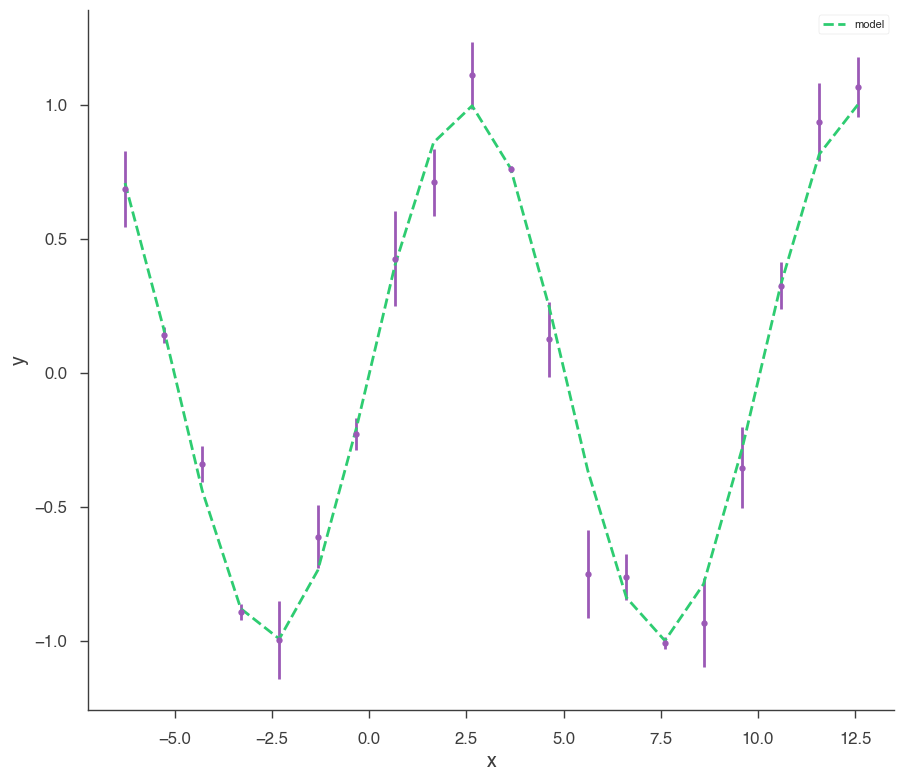

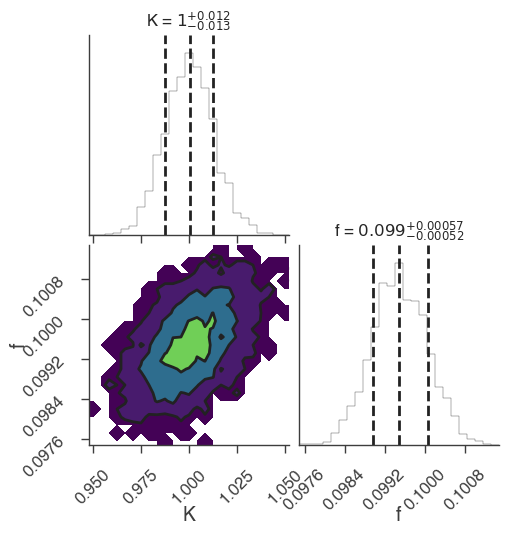

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

02:12:48 INFO      sampler set to zeus                                                     ]8;id=512416;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=842427;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:16, 38.00it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:25, 24.00it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:21, 29.02it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:19, 30.86it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:18, 33.43it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:16, 36.18it/s]

Sampling progress :   5%|▍         | 31/625 [00:00<00:14, 42.37it/s]

Sampling progress :   6%|▌         | 37/625 [00:00<00:13, 44.75it/s]

Sampling progress :   7%|▋         | 42/625 [00:01<00:14, 40.59it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:15, 37.02it/s]

Sampling progress :   8%|▊         | 51/625 [00:01<00:15, 36.94it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:14, 39.07it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:13, 43.10it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:12, 44.85it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:13, 42.23it/s]

Sampling progress :  12%|█▏        | 78/625 [00:02<00:13, 41.74it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:11, 45.16it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:12, 43.33it/s]

Sampling progress :  15%|█▌        | 94/625 [00:02<00:12, 43.71it/s]

Sampling progress :  16%|█▌        | 100/625 [00:02<00:10, 47.83it/s]

Sampling progress :  17%|█▋        | 105/625 [00:02<00:10, 47.95it/s]

Sampling progress :  18%|█▊        | 111/625 [00:02<00:10, 49.70it/s]

Sampling progress :  19%|█▊        | 117/625 [00:02<00:15, 33.12it/s]

Sampling progress :  20%|█▉        | 123/625 [00:03<00:15, 31.95it/s]

Sampling progress :  20%|██        | 127/625 [00:03<00:14, 33.45it/s]

Sampling progress :  21%|██▏       | 133/625 [00:03<00:13, 37.49it/s]

Sampling progress :  22%|██▏       | 139/625 [00:03<00:11, 42.43it/s]

Sampling progress :  23%|██▎       | 145/625 [00:03<00:10, 45.09it/s]

Sampling progress :  24%|██▍       | 150/625 [00:03<00:11, 40.72it/s]

Sampling progress :  25%|██▍       | 155/625 [00:03<00:12, 36.57it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:14, 33.18it/s]

Sampling progress :  26%|██▌       | 164/625 [00:04<00:12, 36.69it/s]

Sampling progress :  27%|██▋       | 171/625 [00:04<00:10, 42.92it/s]

Sampling progress :  28%|██▊       | 176/625 [00:04<00:10, 44.32it/s]

Sampling progress :  29%|██▉       | 182/625 [00:04<00:09, 47.02it/s]

Sampling progress :  30%|██▉       | 187/625 [00:04<00:09, 46.90it/s]

Sampling progress :  31%|███       | 193/625 [00:04<00:08, 49.21it/s]

Sampling progress :  32%|███▏      | 199/625 [00:04<00:08, 48.55it/s]

Sampling progress :  33%|███▎      | 206/625 [00:05<00:07, 52.79it/s]

Sampling progress :  34%|███▍      | 212/625 [00:05<00:08, 51.05it/s]

Sampling progress :  35%|███▍      | 218/625 [00:05<00:07, 51.61it/s]

Sampling progress :  36%|███▌      | 225/625 [00:05<00:07, 56.50it/s]

Sampling progress :  37%|███▋      | 231/625 [00:05<00:06, 57.14it/s]

Sampling progress :  38%|███▊      | 238/625 [00:05<00:06, 59.84it/s]

Sampling progress :  39%|███▉      | 245/625 [00:05<00:06, 61.53it/s]

Sampling progress :  40%|████      | 252/625 [00:05<00:05, 63.28it/s]

Sampling progress :  41%|████▏     | 259/625 [00:05<00:05, 62.12it/s]

Sampling progress :  43%|████▎     | 266/625 [00:05<00:05, 61.27it/s]

Sampling progress :  44%|████▎     | 273/625 [00:06<00:05, 60.12it/s]

Sampling progress :  45%|████▍     | 280/625 [00:06<00:05, 60.42it/s]

Sampling progress :  46%|████▌     | 287/625 [00:06<00:05, 61.64it/s]

Sampling progress :  47%|████▋     | 294/625 [00:06<00:05, 60.88it/s]

Sampling progress :  48%|████▊     | 301/625 [00:06<00:05, 60.42it/s]

Sampling progress :  49%|████▉     | 308/625 [00:06<00:05, 57.43it/s]

Sampling progress :  50%|█████     | 314/625 [00:06<00:05, 56.92it/s]

Sampling progress :  51%|█████     | 320/625 [00:06<00:05, 57.21it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:07<00:05, 57.21it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:07<00:05, 57.30it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:07<00:05, 55.10it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:07<00:05, 51.97it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:07<00:05, 51.34it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:07<00:04, 54.66it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:07<00:04, 53.37it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:07<00:04, 54.26it/s]

Sampling progress :  60%|██████    | 375/625 [00:07<00:04, 54.21it/s]

Sampling progress :  61%|██████    | 381/625 [00:08<00:04, 52.84it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:08<00:04, 53.95it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:08<00:04, 52.22it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:08<00:04, 50.98it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:08<00:04, 54.44it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:08<00:03, 54.47it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:08<00:03, 55.09it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:08<00:03, 57.48it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:08<00:03, 57.64it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:09<00:03, 57.28it/s]

Sampling progress :  71%|███████   | 443/625 [00:09<00:03, 57.20it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:09<00:03, 56.39it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:09<00:03, 55.42it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:09<00:02, 57.74it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:09<00:02, 57.12it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:09<00:02, 60.55it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:09<00:02, 63.82it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:09<00:02, 61.80it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:10<00:02, 61.15it/s]

Sampling progress :  81%|████████  | 504/625 [00:10<00:01, 61.19it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:10<00:01, 60.20it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:10<00:01, 59.06it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:10<00:01, 60.63it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:10<00:01, 61.11it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:10<00:01, 59.45it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:10<00:01, 57.74it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:10<00:01, 57.77it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:11<00:01, 57.18it/s]

Sampling progress :  90%|█████████ | 563/625 [00:11<00:01, 55.18it/s]

Sampling progress :  91%|█████████ | 570/625 [00:11<00:00, 58.72it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:11<00:00, 57.06it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:11<00:00, 55.22it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:11<00:00, 55.14it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:11<00:00, 55.46it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:11<00:00, 55.36it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:11<00:00, 55.65it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:12<00:00, 57.88it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:12<00:00, 59.54it/s]

Sampling progress : 100%|██████████| 625/625 [00:12<00:00, 50.82it/s]

02:13:01 INFO      fit restored to maximum of posterior                                         ]8;id=391502;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=40125;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=304729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=639262;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 19


Scale Factor: 1.163233


Mean Integrated Autocorrelation Time: 2.77


Effective Sample Size: 4509.17


Number of Log Probability Evaluations: 65267


Effective Samples per Log Probability Evaluation: 0.069088


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.000 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.904736
total,-7.904736


Values of statistical measures:

,statistical measures
AIC,20.515355
BIC,21.800937
DIC,19.758671
PDIC,1.974543


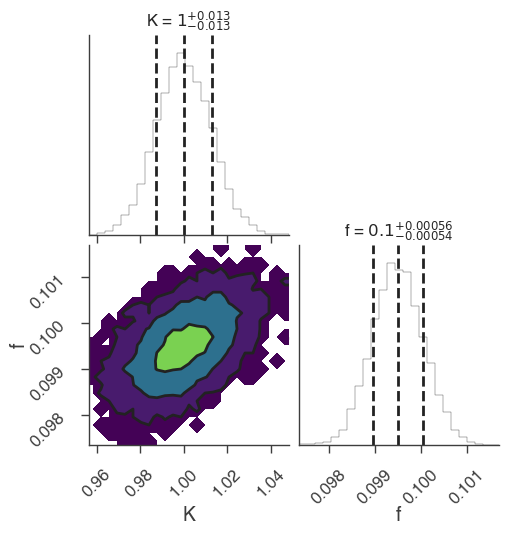

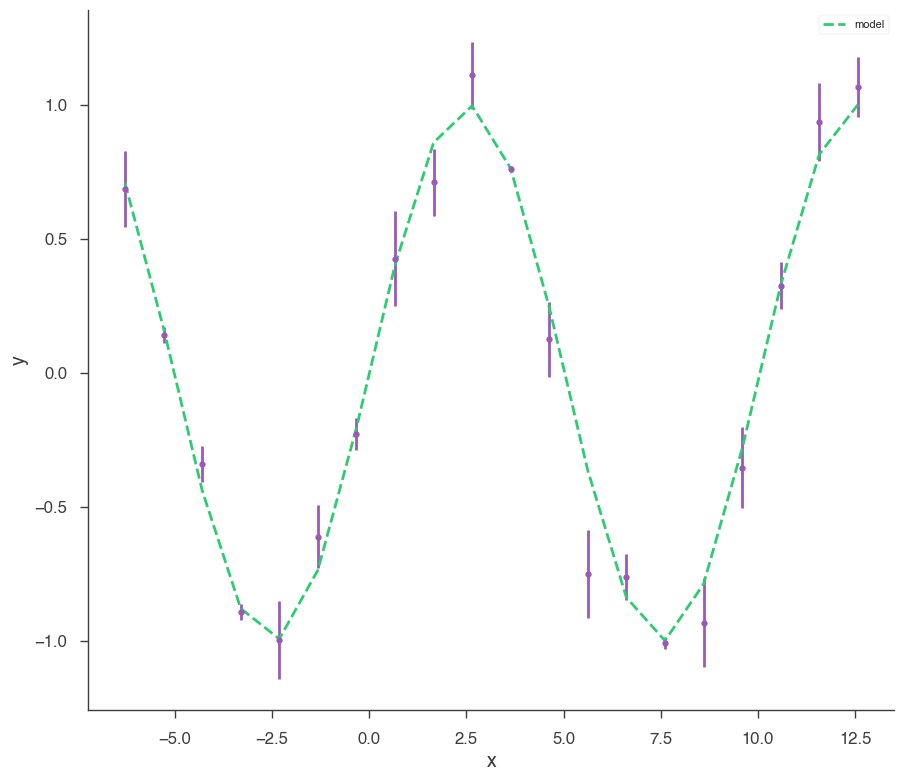

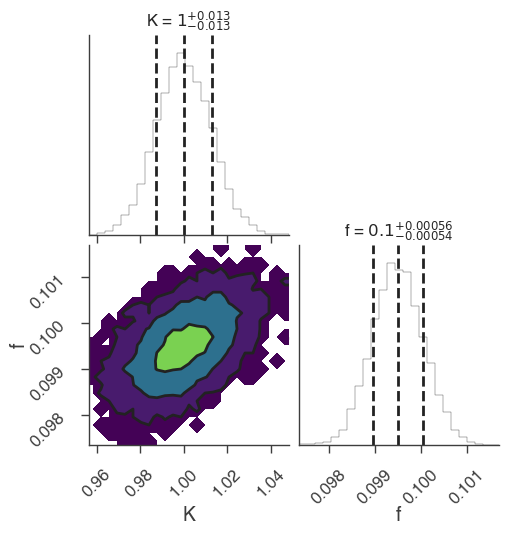

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

02:13:02 INFO      sampler set to ultranest                                                ]8;id=431910;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=497681;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 11959


[ultranest]   logZ = -17.43 +- 0.1118


[ultranest] Effective samples strategy satisfied (ESS = 975.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


02:13:13 INFO      fit restored to maximum of posterior                                         ]8;id=901611;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=6934;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=647679;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=696726;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.001 -0.012 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.905333
total,-7.905333


Values of statistical measures:

,statistical measures
AIC,20.516549
BIC,21.802131
DIC,19.821060
PDIC,2.004761
log(Z),-7.582088


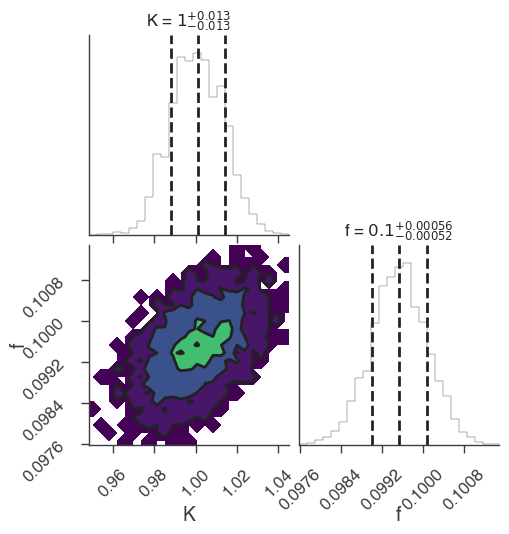

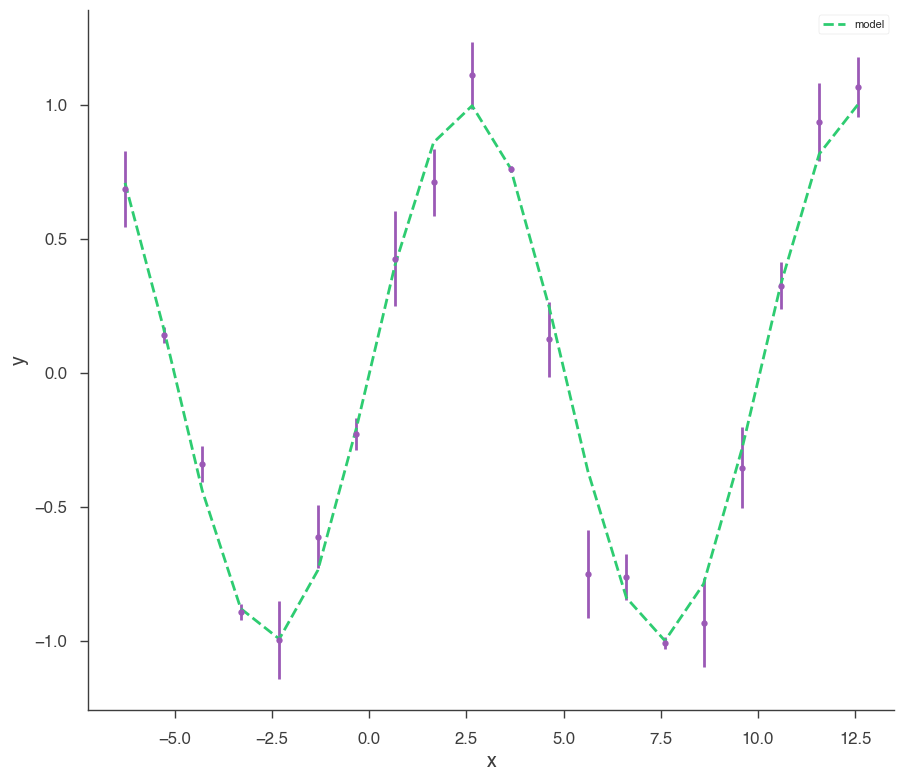

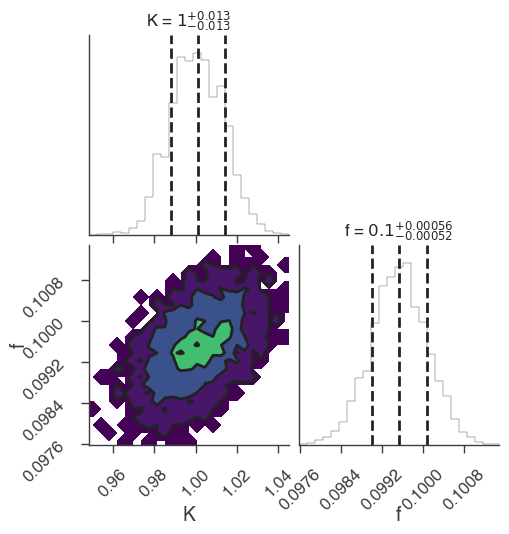

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()